In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
%run function.ipynb

df = pd.read_csv('clean6.csv')
df_copy = df.copy()
print(df_copy.shape)
df_copy.head(3)

(894207, 48)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,OccupiedHousingUnits,MedianHomeValue,MedianHouseholdIncome,DisbursePerEmployee,GrSBA_AppvDiff%,State_division,USDPerJobCreated,loan_marturity_date,Is_Cross_State,Appv_Dusburse_delta
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,1997-02-28,84.0,4.0,...,12895.0,115600.0,48618.0,12000.000000,20.0,Mid-West,NaN,2004-02-28,1,730.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,1997-02-28,60.0,2.0,...,10938.0,120200.0,47863.0,13333.333333,20.0,Mid-West,NaN,2002-02-28,0,92.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,1997-02-28,180.0,7.0,...,17562.0,207900.0,45415.0,35875.000000,25.0,Mid-West,NaN,2012-02-28,0,306.0


In [2]:
df_copy['Default%'] = df_copy['ChgOffPrinGr'] / df_copy['DisbursementGross']
print(df_copy.shape)
df_copy = df_copy[df_copy['DisbursementDate_year'] < 2010]
print(df_copy.shape)

df_copy.loc[list(df_copy[df_copy['Term'] >= 240].index), 'RealEstate'] = 1
df_copy.loc[list(df_copy[df_copy['Term'] < 240].index), 'RealEstate'] = 0

display(df_copy[df_copy['Default'] != 0]['Default%'].describe())

print(df_copy.shape)
df_copy = df_copy[~(df_copy['Default%'] > 1)]
print(df_copy.shape)

(894207, 49)
(856048, 49)


count    157721.000000
mean          0.552629
std           0.254444
min           0.000001
25%           0.354328
50%           0.554395
75%           0.771685
max           7.630696
Name: Default%, dtype: float64

(856048, 50)
(855794, 50)


In [3]:
df_copy['DisbursementDate'] = pd.to_datetime(df_copy['DisbursementDate'])
df_copy['loan_marturity_date'] = pd.to_datetime(df_copy['loan_marturity_date'])
df_copy['ChgOffDate'] = pd.to_datetime(df_copy['ChgOffDate'])
df_copy['ApprovalDate'] = pd.to_datetime(df_copy['ApprovalDate'])

In [4]:
# Great Recession
import datetime
recession_index = list(df_copy[(df_copy['DisbursementDate'] > datetime.datetime(2007, 12, 1)) & (df_copy['loan_marturity_date'] < datetime.datetime(2009, 6, 30))].index)
df_copy.loc[recession_index, 'GreatRecession'] = 1
df_copy['GreatRecession'].fillna(0, inplace=True)
print('Great Recession')
display(df_copy['GreatRecession'].value_counts())

dotcom_index = list(df_copy[(df_copy['DisbursementDate'] > datetime.datetime(2000, 1, 1)) & (df_copy['loan_marturity_date'] < datetime.datetime(2001, 12, 31))].index)
df_copy.loc[dotcom_index, 'DotCom'] = 1
df_copy['DotCom'].fillna(0, inplace=True)
print('DotCom')
display(df_copy['DotCom'].value_counts())

df_copy['Recession'] = df_copy['GreatRecession'] + df_copy['DotCom']

print('Recession')
display(df_copy['Recession'].value_counts())

Great Recession


0.0    853450
1.0      2344
Name: GreatRecession, dtype: int64

DotCom


0.0    851700
1.0      4094
Name: DotCom, dtype: int64

Recession


0.0    849356
1.0      6438
Name: Recession, dtype: int64

In [5]:
print('Great Recession')
display(df_copy[df_copy['GreatRecession'] == 1]['Default'].value_counts())
print('DotCom')
display(df_copy[df_copy['DotCom'] == 1]['Default'].value_counts())
print('Recession')
display(df_copy[df_copy['Recession'] == 1]['Default'].value_counts())

Great Recession


1.0    1335
0.0    1009
Name: Default, dtype: int64

DotCom


0.0    2719
1.0    1375
Name: Default, dtype: int64

Recession


0.0    3728
1.0    2710
Name: Default, dtype: int64

In [6]:
mon14710_index = list(df_copy[(df_copy['DisbursementDate_month'] == 1) | (df_copy['DisbursementDate_month'] == 4) | (df_copy['DisbursementDate_month'] == 7) | (df_copy['DisbursementDate_month'] == 10)].index)
df_copy.loc[mon14710_index, 'Mon_Is_14710'] = 1
df_copy['Mon_Is_14710'].fillna(0, inplace=True)

In [7]:
obj_features = ['State', 'BankState', 'NewExist', 'IsFranchised', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry',
                'ApprovalDate_year', 'ApprovalDate_month', 'DisbursementDate_year', 'DisbursementDate_month', 'State_division', 'RealEstate',
                'GreatRecession', 'DotCom', 'Recession', 'Mon_Is_14710']
num_features = ['Default', 'ChgOffPrinGr', 'Term', 'DisbursementGross', 'Bank%', 'DisbursePerEmployee',
                'USDPerJobCreated','NoEmp', 'CreateJob', 'RetainedJob', 'Population', 'PopDensity', 'GrAppv', 'SBA_Appv',
                'HousingUnits', 'OccupiedHousingUnits', 'MedianHomeValue', 'MedianHouseholdIncome']
time_cols = ['ApprovalDate_year', 'ApprovalDate_month', 'DisbursementDate_year', 'DisbursementDate_month']

df_copy.rename(columns={'GrSBA_AppvDiff%': 'Bank%'}, inplace=True)

df_groupby_mean = dict()
df_groupby_size = dict()
df_groupby_sum = dict()

for col in obj_features:
    df_groupby_mean[col] = df_copy.groupby(by=col).mean()[num_features]
    df_groupby_sum[col] = df_copy.groupby(by=col).sum()[num_features]
    df_groupby_size[col] = pd.DataFrame(df_copy.groupby(by=col).size())
    df_groupby_size[col].rename(columns={0: 'size'}, inplace=True)

In [8]:
# df_groupby_mean['State'].to_csv('State_mean.csv')
# df_groupby_mean['BankState'].to_csv('BankState_mean.csv')
# df_groupby_sum['State'].to_csv('State_sum.csv')
# df_groupby_sum['BankState'].to_csv('BankState_sum.csv')

# UrbanRural Undefined

In [9]:
# # UrbanRural延伸分析

# data = df_copy.groupby(by=['DisbursementDate_year', 'UrbanRural']).mean()
# data_long = data.melt(ignore_index=False).reset_index()
# data_def = data_long[data_long['variable'] == 'Default']

# data_def = data_def[data_def['DisbursementDate_year'] >= 1972]
# data_def[['DisbursementDate_year', 'UrbanRural']] = data_def[['DisbursementDate_year', 'UrbanRural']].applymap(lambda x: int(x))

# year_list = list(df_groupby_mean['ApprovalDate_year'][~(df_copy.groupby(by='ApprovalDate_year').size().values < 30)].index)

# data = pd.DataFrame(df_copy.groupby(by=['DisbursementDate_year', 'UrbanRural']).size()).reset_index()
# data.rename(columns={0: 'count'}, inplace=True)
# data = data[data['DisbursementDate_year'] >= 1972]
# data[['DisbursementDate_year', 'UrbanRural']] = data[['DisbursementDate_year', 'UrbanRural']].applymap(lambda x: int(x))

# plt.figure(figsize=(20,10))

# num = 'Default'

# plt.title('Mean {} by DisbursementDate_year_UrbanRural'.format(num))
# plt.grid(True)
# plt.vlines(x=[2006.0], ymin=data_def['value'].min(), ymax=data_def['value'].max(), color='r', linestyles='dashed')
# sns.lineplot(data=data_def, x=data_def['DisbursementDate_year'], y=data_def['value'], marker=True, hue='UrbanRural',
#              palette="flare")
# plt.savefig('Mean {} by DisbursementDate_year_UrbanRural.jpeg'.format(num))
# plt.legend(title='UrbanRural', fontsize=20, title_fontsize=20)

# plt.figure(figsize=(20,10))
# plt.title('Size by DisbursementDate_year_UrbanRural'.format(num))
# plt.grid(True)
# plt.vlines(x=[2006.0], ymin=data['count'].min(), ymax=data['count'].max(), color='r', linestyles='dashed')
# sns.lineplot(data=data, x=data['DisbursementDate_year'], y=data['count'], marker=True, hue='UrbanRural',
#              palette="flare")
# plt.savefig('Size by DisbursementDate_year_UrbanRural.jpeg')
# plt.legend(title='UrbanRural', fontsize=16, title_fontsize=20)

# plt.show()

In [10]:
# size_hue_disbursementyear(df_copy, hue_cols=obj_features, year_col='DisbursementDate_year')

In [11]:
# mean_default_hue_disbursementyear(df_copy, hue_cols=obj_features, year_col='DisbursementDate_year')

In [12]:
# # RevLineCr延伸分析
# dfd1 = df_copy[df_copy['Default'] == 1]

# data = dfd1.groupby(by=['DisbursementDate_year', 'RevLineCr']).mean()
# data_long = data.melt(ignore_index=False).reset_index()
# data_def = data_long[data_long['variable'] == 'Default']

# data_def = data_def[data_def['DisbursementDate_year'] >= 1972]
# data_def[['DisbursementDate_year', 'RevLineCr']] = data_def[['DisbursementDate_year', 'RevLineCr']].applymap(lambda x: int(x))

# year_list = list(df_groupby_mean['ApprovalDate_year'][~(df_copy.groupby(by='ApprovalDate_year').size().values < 30)].index)

# data = pd.DataFrame(dfd1.groupby(by=['DisbursementDate_year', 'RevLineCr']).size()).reset_index()
# data.rename(columns={0: 'count'}, inplace=True)
# data = data[data['DisbursementDate_year'] >= 1972]
# data[['DisbursementDate_year', 'RevLineCr']] = data[['DisbursementDate_year', 'RevLineCr']].applymap(lambda x: int(x))

# plt.figure(figsize=(20,10))
# plt.title('Default = 1 Size by DisbursementDate_year_RevLineCr'.format(num))
# plt.grid(True)
# plt.vlines(x=[2006.0], ymin=data['count'].min(), ymax=data['count'].max(), color='r', linestyles='dashed')
# sns.lineplot(data=data, x=data['DisbursementDate_year'], y=data['count'], marker=True, hue='RevLineCr',
#              palette="flare")
# plt.savefig('Default = 1 Size by DisbursementDate_year_RevLineCr.jpeg')
# plt.legend(title='RevLineCr', fontsize=16, title_fontsize=20)

# plt.show()

In [13]:
# # RevLineCr延伸分析
# dfd0 = df_copy[df_copy['Default'] == 0]

# data = dfd0.groupby(by=['DisbursementDate_year', 'RevLineCr']).mean()
# data_long = data.melt(ignore_index=False).reset_index()
# data_def = data_long[data_long['variable'] == 'Default']

# data_def = data_def[data_def['DisbursementDate_year'] >= 1972]
# data_def[['DisbursementDate_year', 'RevLineCr']] = data_def[['DisbursementDate_year', 'RevLineCr']].applymap(lambda x: int(x))

# year_list = list(df_groupby_mean['ApprovalDate_year'][~(df_copy.groupby(by='ApprovalDate_year').size().values < 30)].index)

# data = pd.DataFrame(dfd0.groupby(by=['DisbursementDate_year', 'RevLineCr']).size()).reset_index()
# data.rename(columns={0: 'count'}, inplace=True)
# data = data[data['DisbursementDate_year'] >= 1972]
# data[['DisbursementDate_year', 'RevLineCr']] = data[['DisbursementDate_year', 'RevLineCr']].applymap(lambda x: int(x))

# plt.figure(figsize=(20,10))
# plt.title('Default = 0 Size by DisbursementDate_year_RevLineCr'.format(num))
# plt.grid(True)
# plt.vlines(x=[2006.0], ymin=data['count'].min(), ymax=data['count'].max(), color='r', linestyles='dashed')
# sns.lineplot(data=data, x=data['DisbursementDate_year'], y=data['count'], marker=True, hue='RevLineCr',
#              palette="flare")
# plt.savefig('Default = 0 Size by DisbursementDate_year_RevLineCr.jpeg')
# plt.legend(title='RevLineCr', fontsize=16, title_fontsize=20)

# plt.show()

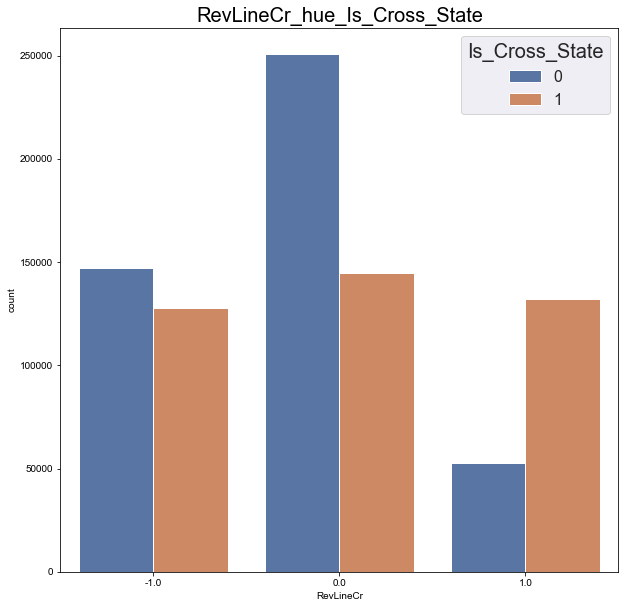

In [14]:
# obj_visualization_with_hue(df_copy, obj_features=['RevLineCr'], hue_col='Is_Cross_State')

In [16]:
# compare_d0d1term = pd.concat([dfd0['Term'].describe(), dfd1['Term'].describe()], axis=1)
# compare_d0d1term.columns=['Default = 0', 'Default = 1']
# compare_d0d1term

In [17]:
# df_copy['DisbursementDate_month'].value_counts()

In [18]:
# size_hue_disbursementyear(df_copy, hue_cols=['DisbursementDate_month'], year_col='DisbursementDate_year')

In [19]:
# df_firstmon = df_copy[(df_copy['DisbursementDate_month'] == 1) | (df_copy['DisbursementDate_month'] == 4) | (df_copy['DisbursementDate_month'] == 7) | (df_copy['DisbursementDate_month'] == 10)]
# df_notfirstmon = df_copy[~((df_copy['DisbursementDate_month'] == 1) | (df_copy['DisbursementDate_month'] == 4) | (df_copy['DisbursementDate_month'] == 7) | (df_copy['DisbursementDate_month'] == 10))]
# df_copy.loc[list(df_notfirstmon.index), 'Mon_Is_14710'] = 0
# df_copy.loc[list(df_firstmon.index), 'Mon_Is_14710'] = 1

In [20]:
# obj_visualization_with_hue(df_copy, obj_features, hue_col='Mon_Is_14710')

In [21]:
# size_hue_disbursementyear(df_copy, hue_cols=['Mon_Is_14710'], year_col='DisbursementDate_year')

In [22]:
# num_visualization_with_hue(df_copy, num_features, hue_col='Mon_Is_14710')

In [24]:
# plt.figure(figsize=(20, 10))
# sns.set_theme(style="darkgrid")
# sns.ecdfplot(data=df_copy, x='Default%', hue='RevLineCr', palette=sns.color_palette("Set2")[:3])
# plt.show()

In [25]:
# for i in range(len(num_features)):
#     num_col = num_features[i]
#     if num_col == 'Default' or num_col == 'ChgOffPrinGr':
#         continue
#     else:
#         plt.figure(figsize=(20, 10))
#         sns.set_theme(style="darkgrid")
#         title = num_col + '_ecdf'
#         plt.title(title)
#         plt.hlines(y=0.5, xmin=df_copy[num_col].min(), xmax=df_copy[num_col].max(), colors='r', linestyles='dashed')
#         sns.ecdfplot(data=df_copy, x=num_col, hue='Default', palette=sns.color_palette("Set2")[:2])
#         plt.savefig(title + '.jpeg')
#         plt.show()

In [26]:
# new_cols=list(df_copy.columns[-5:])
# print(new_cols)
# num = 'Default'
# for i in range(len(new_cols)):
#     plt.figure(figsize=(8,10))
#     vis = df_groupby_mean[new_cols[i]].sort_values(by=num, ascending=False)
#     title = 'Mean Default by '+ new_cols[i]
#     plt.title(title)
#     sns.set_theme(style="darkgrid")
#     plt.grid(True)
#     sns.barplot(x=vis.index, y=vis[num])
#     plt.savefig(title + '.jpeg')
#     plt.show()

In [27]:
# for i in range(len(obj_features)):
#     if df_copy[obj_features[i]].nunique() < 8:
#             plt.figure(figsize=(10, 10))
#     elif obj_features[i] == 'Industry':
#         plt.figure(figsize=(20, 15))
#         vis = df_groupby_mean[obj_features[i]].sort_values(by=num, ascending=False)
#         title = 'Mean Default by '+ obj_features[i]
#         plt.title(title)
#         sns.set_theme(style="darkgrid")
#         plt.grid(True)
#         sns.barplot(y=vis.index, x=vis[num])
#         plt.savefig(title + '.jpeg')
#         plt.show()
#         continue
#     elif obj_features[i] in time_cols or 'State' in obj_features[i]:
#         continue
#     else:
#         plt.figure(figsize=(20, 10))
#     vis = df_groupby_mean[obj_features[i]].sort_values(by=num, ascending=False)
#     title = 'Mean Default by '+ obj_features[i]
#     plt.title(title)
#     sns.set_theme(style="darkgrid")
#     plt.grid(True)
#     sns.barplot(x=vis.index, y=vis[num])
#     plt.savefig(title + '.jpeg')
#     plt.show()

In [28]:
# df_copy.to_csv('clean8.csv', index=False)

In [29]:
# display(df_copy.iloc[:3,:23])
# display(df_copy.iloc[:3,23:])

In [30]:
# %run function.ipynb

In [31]:
# year_col_visualization(df_copy, num_features=['Default'], year_col='DisbursementDate_year')

In [32]:
# obj_visualization(df_copy, obj_features=['DisbursementDate_year'])

In [33]:
# df_vis = df.copy()
# df_vis = df_vis[(df_vis['DisbursementDate_year'] >= 1980) & (df_vis['DisbursementDate_year'] >= 1980)]
# df_vis['DisbursementDate_year'] = df_vis['DisbursementDate_year'].astype('int64')

# df_vis = df_vis[~pd.isnull(df_vis['DisbursementDate_year'])]
# order = list(df.groupby(by='DisbursementDate_year').size().sort_values(ascending=False).index)

# plt.figure(figsize=(23, 10))

# #     plt.subplot(len(obj_features), 1, i + 1)
# plt.title('barplot_{}'.format('DisbursementDate_year'), fontsize=20)
# sns.set_theme(style="darkgrid")

# if ('DisbursementDate_year' != 'Industry') & ('State' not in 'DisbursementDate_year'):  
#     # small category
#     sns.countplot(x='DisbursementDate_year', data=df_vis, edgecolor='w')
# elif ('DisbursementDate_year' != 'Industry') & ('State' in 'DisbursementDate_year'):  # state系列
#     sns.countplot(x='DisbursementDate_year', data=df_vis, edgecolor='w', order=order)
# else:  # industry
#     sns.countplot(y='DisbursementDate_year', data=df_vis, edgecolor='w', order=order)

# plt.savefig('barplot_{}.jpeg'.format('DisbursementDate_year'))
# df_vis = df.copy()

# plt.show()

In [46]:
%run function.ipynb

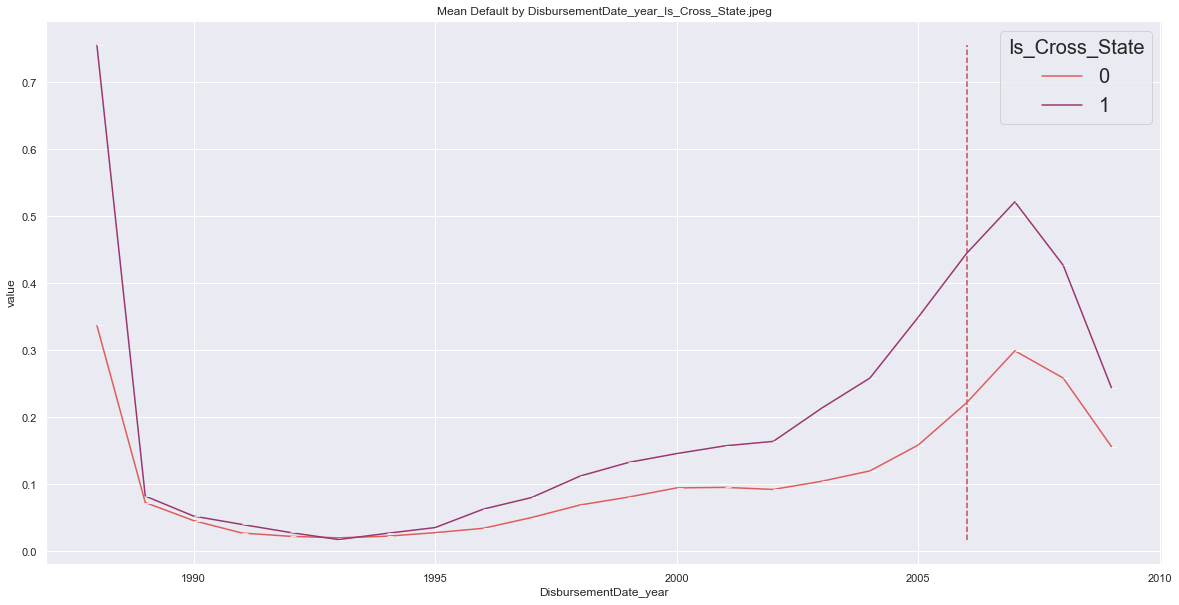

In [47]:
df_vis = df_copy[df_copy['DisbursementDate_year'] >= 1988]
mean_default_hue_disbursementyear(df_vis, hue_cols=['Is_Cross_State'], year_col='DisbursementDate_year')

In [36]:
df_vis

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,USDPerJobCreated,loan_marturity_date,Is_Cross_State,Appv_Dusburse_delta,Default%,RealEstate,GreatRecession,DotCom,Recession,Mon_Is_14710
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,1997-02-28,84.0,4.0,...,NaN,2004-02-28,1,730.0,NaN,0.0,0.0,0.0,0.0,0.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,1997-02-28,60.0,2.0,...,NaN,2002-02-28,0,92.0,NaN,0.0,0.0,0.0,0.0,0.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,1997-02-28,180.0,7.0,...,NaN,2012-02-28,0,306.0,NaN,0.0,0.0,0.0,0.0,0.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,1997-02-28,60.0,2.0,...,NaN,2002-02-28,0,122.0,NaN,0.0,0.0,0.0,0.0,0.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,1997-02-28,240.0,14.0,...,49376.096878,2017-02-28,0,75.0,NaN,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894202,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,1997-02-27,60.0,6.0,...,NaN,2002-02-27,1,215.0,NaN,0.0,0.0,0.0,0.0,0.0
894203,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,1997-02-27,60.0,6.0,...,NaN,2002-02-27,1,246.0,NaN,0.0,0.0,0.0,0.0,1.0
894204,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,1997-02-27,108.0,26.0,...,NaN,2006-02-27,0,215.0,NaN,0.0,0.0,0.0,0.0,0.0
894205,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,1997-02-27,60.0,6.0,...,NaN,2002-02-27,0,32.0,0.582334,0.0,0.0,0.0,0.0,0.0
